In [5]:
#!pip install twitterscraper

In [3]:
from twitterscraper import query_tweets
import datetime as dt
import pandas as pd
import seaborn as sns

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'}


In [4]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [4]:
# argumentos de las queries
query_params = [
               {"mes": "marzo", "begin_date": dt.date(2020, 3, 1), "end_date": dt.date(2020, 3, 31)},
               {"mes": "abril", "begin_date": dt.date(2020, 4, 1), "end_date": dt.date(2020, 4, 30)},
               {"mes": "mayo",  "begin_date": dt.date(2020, 5, 1), "end_date": dt.date(2020, 5, 31)},
               {"mes": "junio", "begin_date": dt.date(2020, 6, 1), "end_date": dt.date(2020, 6, 30)}
]

In [5]:
# página twitterscraper
# https://github.com/taspinar/twitterscraper

for args in query_params:

    # crear la query
    begin_date = args["begin_date"]   # fecha de inicio
    end_date = args["end_date"]       # fecha de fin
    limit = 10000                     # limite de tweets
    lang = "es"                       # lenguage
    poolsize = 100                     # para que te devuelva en streeming(de 100 en 100 envia)
    
    # realizar la query
    tweets = query_tweets("#vizcarra OR #coronavirusPeru", # hastags a buscar
                      begindate=begin_date, 
                      enddate=end_date, 
                      limit=limit, 
                      lang=lang,
                      poolsize=poolsize)
    
    # almacenar los tweets en un data frame
    df = pd.DataFrame(x.__dict__ for x in tweets)   #  __dict__ (te devuelve una lista de diccionario, donde a cada variable le asigna el valor observasdo)
    
    # guardar el los tweets en un archivo csv
    df.to_csv('recursos/tweets_data/df_tweets_' + args["mes"] + '.csv', 
                index=False, 
                encoding="utf-8")

INFO: queries: ['#vizcarra OR #coronavirusPeru since:2020-03-01 until:2020-03-02', '#vizcarra OR #coronavirusPeru since:2020-03-02 until:2020-03-03', '#vizcarra OR #coronavirusPeru since:2020-03-03 until:2020-03-04', '#vizcarra OR #coronavirusPeru since:2020-03-04 until:2020-03-05', '#vizcarra OR #coronavirusPeru since:2020-03-05 until:2020-03-06', '#vizcarra OR #coronavirusPeru since:2020-03-06 until:2020-03-07', '#vizcarra OR #coronavirusPeru since:2020-03-07 until:2020-03-08', '#vizcarra OR #coronavirusPeru since:2020-03-08 until:2020-03-09', '#vizcarra OR #coronavirusPeru since:2020-03-09 until:2020-03-10', '#vizcarra OR #coronavirusPeru since:2020-03-10 until:2020-03-11', '#vizcarra OR #coronavirusPeru since:2020-03-11 until:2020-03-12', '#vizcarra OR #coronavirusPeru since:2020-03-12 until:2020-03-13', '#vizcarra OR #coronavirusPeru since:2020-03-13 until:2020-03-14', '#vizcarra OR #coronavirusPeru since:2020-03-14 until:2020-03-15', '#vizcarra OR #coronavirusPeru since:2020-03-1

INFO: Got 169 tweets (16 new).
INFO: Got 186 tweets (17 new).
INFO: Got 203 tweets (17 new).
INFO: Got 219 tweets (16 new).
INFO: Got 237 tweets (18 new).
INFO: Got 255 tweets (18 new).
INFO: Got 270 tweets (15 new).
INFO: Got 290 tweets (20 new).
INFO: Got 304 tweets (14 new).
INFO: Got 321 tweets (17 new).
INFO: Got 339 tweets (18 new).
INFO: Got 356 tweets (17 new).
INFO: Got 372 tweets (16 new).
INFO: Got 387 tweets (15 new).
INFO: Got 404 tweets (17 new).
INFO: Got 422 tweets (18 new).
INFO: Got 437 tweets (15 new).
INFO: Got 454 tweets (17 new).
INFO: Got 470 tweets (16 new).
INFO: Got 488 tweets (18 new).
INFO: Got 508 tweets (20 new).
INFO: queries: ['#vizcarra OR #coronavirusPeru since:2020-06-01 until:2020-06-02', '#vizcarra OR #coronavirusPeru since:2020-06-02 until:2020-06-03', '#vizcarra OR #coronavirusPeru since:2020-06-03 until:2020-06-04', '#vizcarra OR #coronavirusPeru since:2020-06-04 until:2020-06-05', '#vizcarra OR #coronavirusPeru since:2020-06-05 until:2020-06-06'

In [3]:
def unirDataFrames(lista):
    
    # lista de dataframes          # que dataframes se unen los bloques de tuits que hemos rescatado
    dataframes = []
    
    for file in lista:

        # leer el dataframe
        temp_df = pd.read_csv(file)
        
        # cambiar el formato de la fecha
        temp_df["timestamp"] = pd.to_datetime(temp_df["timestamp"])  # cambiar el formato de fecha
        
        # agregar el nuevo dataframe a la lista
        dataframes.append(temp_df)
    
    # unir verticalmente los dataframes
    final_df = pd.concat(dataframes) 
    
    return final_df

In [18]:
# archivos csv que contienen los tweets
archivos_meses = [
                   'recursos/tweets_data/df_tweets_marzo.csv',
                   'recursos/tweets_data/df_tweets_abril.csv',
                   'recursos/tweets_data/df_mayo.csv',
                   'recursos/tweets_data/df_junio.csv'
                  ]

In [19]:
# agrupar los tweets en un solo dataframe
data = unirDataFrames(archivos_meses)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24110 entries, 0 to 4072
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   screen_name       24110 non-null  object        
 1   username          24110 non-null  object        
 2   user_id           24110 non-null  int64         
 3   tweet_id          24110 non-null  int64         
 4   tweet_url         24110 non-null  object        
 5   timestamp         24110 non-null  datetime64[ns]
 6   timestamp_epochs  24110 non-null  int64         
 7   text              24110 non-null  object        
 8   text_html         24110 non-null  object        
 9   links             24110 non-null  object        
 10  hashtags          24110 non-null  object        
 11  has_media         24110 non-null  bool          
 12  img_urls          24110 non-null  object        
 13  video_url         0 non-null      float64       
 14  likes             24110

In [21]:
# filtrar tweets con videos
mask = ((data["has_media"] == False) | ( (data["has_media"] == True) & (data["video_url"] == "")))
data = data[mask]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18352 entries, 0 to 4071
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   screen_name       18352 non-null  object        
 1   username          18352 non-null  object        
 2   user_id           18352 non-null  int64         
 3   tweet_id          18352 non-null  int64         
 4   tweet_url         18352 non-null  object        
 5   timestamp         18352 non-null  datetime64[ns]
 6   timestamp_epochs  18352 non-null  int64         
 7   text              18352 non-null  object        
 8   text_html         18352 non-null  object        
 9   links             18352 non-null  object        
 10  hashtags          18352 non-null  object        
 11  has_media         18352 non-null  bool          
 12  img_urls          18352 non-null  object        
 13  video_url         0 non-null      float64       
 14  likes             18352

c:\users\diego\appdata\local\programs\python\python38\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [22]:
# conservar las variables necesarias para el análisis
data = data.loc[:, ["timestamp", "text"]]      #solo toma etiquetas de índice y devuelve una fila o un marco de datos si la etiqueta de índice existe en el marco de datos 

# cambiar el nombre de las columnas
data.columns = ["fecha", "texto"]     

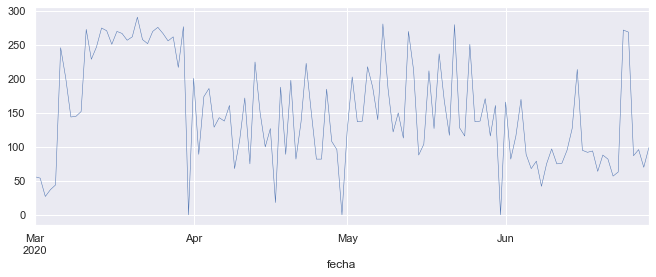

In [24]:
# gráfico de frecuencia de tweets por día
data.index = data["fecha"]
data.resample('D')["texto"].count().plot(linewidth=0.5)  # datetime accessor pandas   # resample para agrupar toodas las fechas por dia deesde hasta.

In [25]:
# guardar los tweets completos en un csv para la etapa de predicción
data.to_csv('recursos/prediccion/bd_tweets.csv', 
            index=False,
            encoding="utf-8")